In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime as date


def counts_to_bioz(counts):
    vref = 1
    bioz_gain = 10
    i_mag = 45.249e-6
    two_over_pi=2/np.pi
    
    bioz = (counts * vref)/(pow(2, 19)*bioz_gain*two_over_pi*i_mag)
    
    return bioz

# 109312.00 1311.00 -1852.00
# 3416.00 5445.00 -6321.00
counts_to_bioz(7891.00)

52.248402576945736

### Manual calibration

In [22]:
# globals
vref = 1
bioz_gain = 10
i_mag = 45.249e-6

df = pd.read_csv("logs_32655-system/calibration/offsets_pt3.txt", sep=" ")
df_131k = df[df["frq"] == 131328.0]
df_4k = df[df["frq"] == 4104.0]

print(df)

I_offset_131k = df_131k["I"].mean()
Q_offset_131k = df_131k["Q"].mean()
I_offset_4k = df_4k["I"].mean()
Q_offset_4k = df_4k["Q"].mean()

print(I_offset_131k, Q_offset_131k)
print(I_offset_4k, Q_offset_4k)


        frq        I        Q
0      4104 -3890.00  3158.35
1    131328  -341.00  6412.71
2      4104 -2972.96   562.81
3      4104 -2539.26 -2946.47
4    131328 -1178.59  5965.78
..      ...      ...      ...
911    4104 -1883.76   741.58
912    4104 -4426.33   781.31
913  131328  4406.46 -1453.37
914    4104  1003.12 -4446.19
915  131328  3939.66  6690.81

[916 rows x 3 columns]
583.4217826086957 4970.10897826087
-3255.0727850877192 283.94570175438594


In [23]:
df = pd.read_csv("logs_32655-system/calibration/measure_resistor_inphase_3.txt", sep=" ")


df_131k = df[df["frq"] == 131328.0]


df_131k

,frq,I,Q
1,131328,173.52,-178.67
3,131328,169.29,-174.34
6,131328,164.59,-169.55
8,131328,184.64,-189.74
10,131328,180.61,-185.61
...,...,...,...
921,131328,157.56,-162.64
922,131328,189.48,-194.51
924,131328,174.49,-179.55
927,131328,173.96,-179.07


In [24]:
df_4k = df[df["frq"] == 4104.0]

df_4k

,frq,I,Q
0,4104,436.40,-445.25
2,4104,445.03,-450.29
4,4104,436.48,-441.67
5,4104,440.72,-445.99
7,4104,440.41,-445.71
...,...,...,...
919,4104,440.47,-445.71
920,4104,438.78,-444.04
923,4104,439.88,-445.12
925,4104,440.08,-445.33


In [25]:
I_inphase_131k = df_131k["I"].mean()
Q_inphase_131k = df_131k["Q"].mean()
I_inphase_4k = df_4k["I"].mean()
Q_inphase_4k = df_4k["Q"].mean()

print(I_inphase_131k, Q_inphase_131k)
print(I_inphase_4k, Q_inphase_4k)
print(counts_to_bioz(I_inphase_131k), counts_to_bioz(Q_inphase_131k))
print(counts_to_bioz(I_inphase_4k), counts_to_bioz(Q_inphase_4k))

175.75503225806452 -180.77944086021506
439.2544827586207 -444.52870689655174
1.16372065395304 -1.1969885950702914
2.9084203584970836 -2.943342394492479


In [26]:
df = pd.read_csv("logs_32655-system/calibration/measure_resistor_quadphase_3.txt", sep=" ")

df_131k = df[df["frq"] == 131328.0]
df_4k = df[df["frq"] == 4104.0]

I_quadphase_131k = df_131k["I"].mean()
Q_quadphase_131k = df_131k["Q"].mean()
I_quadphase_4k = df_4k["I"].mean()
Q_quadphase_4k = df_4k["Q"].mean()

print(I_quadphase_131k, Q_quadphase_131k)
print(I_quadphase_4k, Q_quadphase_4k)

-466.15383297644547 461.2035546038544
-32.3984829059829 27.31181623931624


In [27]:
calibrated_I_inphase_131k = I_inphase_131k - I_offset_131k
calibrated_I_quadphase_131k = I_quadphase_131k - I_offset_131k
calibrated_Q_inphase_131k = Q_inphase_131k - Q_offset_131k
calibrated_Q_quadphase_131k = Q_quadphase_131k - Q_offset_131k

I_coef_131k = np.sqrt((np.pow(calibrated_I_inphase_131k, 2) + np.pow(calibrated_I_quadphase_131k, 2))) / 250
Q_coef_131k = np.sqrt((np.pow(calibrated_Q_inphase_131k, 2) + np.pow(calibrated_Q_quadphase_131k, 2))) / 250

I_phase_coef_131k = np.degrees(np.arctan(calibrated_I_quadphase_131k / calibrated_I_inphase_131k))
Q_phase_coef_131k = np.degrees(np.arctan(-calibrated_Q_quadphase_131k / -calibrated_Q_inphase_131k))

In [28]:
calibrated_I_inphase_4k = I_inphase_4k - I_offset_4k
calibrated_I_quadphase_4k = I_quadphase_4k - I_offset_4k
calibrated_Q_inphase_4k = Q_inphase_4k - Q_offset_4k
calibrated_Q_quadphase_4k = Q_quadphase_4k - Q_offset_4k

I_coef_4k = np.sqrt((np.pow(calibrated_I_inphase_4k, 2) + np.pow(calibrated_I_quadphase_4k, 2)))/250
Q_coef_4k = np.sqrt((np.pow(calibrated_Q_inphase_4k, 2) + np.pow(calibrated_Q_quadphase_4k, 2)))/250
I_phase_coef_4k = np.degrees(np.arctan(calibrated_I_quadphase_4k / calibrated_I_inphase_4k))
Q_phase_coef_4k = np.degrees(np.arctan(-calibrated_Q_quadphase_4k / -calibrated_Q_inphase_4k))

In [29]:
print("===== COEFICIENTES DE CALIBRACIÓN =====\n")

print("---- Offsets ----")
print(f"4 kHz I Offset: {I_offset_4k}")
print(f"4 kHz Q Offset: {Q_offset_4k}")
print(f"131 kHz I Offset: {I_offset_131k}")
print(f"131 kHz Q Offset: {Q_offset_131k}\n")

print("---- 4 kHz ----")
print(f"I_coef_4k: {I_coef_4k:.6f}")
print(f"Q_coef_4k: {Q_coef_4k:.6f}")
print(f"I_phase_coef_4k [°]: {I_phase_coef_4k:.6f}")
print(f"Q_phase_coef_4k [°]: {Q_phase_coef_4k:.6f}\n")

print("---- 131 kHz ----")
print(f"I_coef_131k: {I_coef_131k:.6f}")
print(f"Q_coef_131k: {Q_coef_131k:.6f}")
print(f"I_phase_coef_131k [°]: {I_phase_coef_131k:.6f}")
print(f"Q_phase_coef_131k [°]: {Q_phase_coef_131k:.6f}")

===== COEFICIENTES DE CALIBRACIÓN =====

---- Offsets ----
4 kHz I Offset: -3255.0727850877192
4 kHz Q Offset: 283.94570175438594
131 kHz I Offset: 583.4217826086957
131 kHz Q Offset: 4970.10897826087

---- 4 kHz ----
I_coef_4k: 19.609664
Q_coef_4k: 3.089430
I_phase_coef_4k [°]: 41.099183
Q_phase_coef_4k [°]: 19.406826

---- 131 kHz ----
I_coef_131k: 4.503867
Q_coef_131k: 27.382295
I_phase_coef_131k [°]: 68.773281
Q_phase_coef_131k [°]: 41.197755


# Applying calibration to load measurements

Sampleset without calibration:

In [52]:
df = pd.read_csv("logs_32655-system/load_measurement/sampleset_4_11625_651pm copy.txt", sep=" ")

df_4k = df.loc[df["frq"] == 4104.0].copy()
df_131k = df.loc[df["frq"] == 131328.0].copy()

In [53]:
df_4k["I_offset"] = df_4k["I"] - I_offset_4k
df_4k["Q_offset"] = df_4k["Q"] - Q_offset_4k

df_131k["I_offset"] = df_131k["I"] - I_offset_131k
df_131k["Q_offset"] = df_131k["Q"] - Q_offset_131k

print("Uncalibrated values: \n")
print(f"4.104 kHz I: {df_4k["I"].mean()}")
print(f"4.104 kHz Q: {df_4k["Q"].mean()}")
print(f"131.328 kHz I: {df_131k["I"].mean()}")
print(f"131.328 kHz Q: {df_131k["Q"].mean()}")

df_4k

Uncalibrated values: 

4.104 kHz I: 38.80675847457627
4.104 kHz Q: -25.244978813559324
131.328 kHz I: 23.860798319327735
131.328 kHz Q: -1.1147058823529412


,frq,I,Q,I_offset,Q_offset
0,4104,40.27,-23.41,3295.342785,-307.355702
2,4104,38.66,-25.29,3293.732785,-309.235702
5,4104,38.67,-25.30,3293.742785,-309.245702
7,4104,38.54,-25.32,3293.612785,-309.265702
8,4104,38.69,-25.31,3293.762785,-309.255702
...,...,...,...,...,...
937,4104,38.73,-25.33,3293.802785,-309.275702
940,4104,38.89,-25.29,3293.962785,-309.235702
941,4104,38.73,-25.16,3293.802785,-309.105702
944,4104,38.78,-25.39,3293.852785,-309.335702


In [55]:
import numpy as np

# ---------- 4 kHz ----------
I_cal_real_4k = (df_4k["I_offset"] / I_coef_4k) * np.cos(np.radians(I_phase_coef_4k))
I_cal_imag_4k = (df_4k["I_offset"] / I_coef_4k) * np.sin(np.radians(I_phase_coef_4k))
Q_cal_real_4k = (df_4k["Q_offset"] / Q_coef_4k) * np.sin(np.radians(Q_phase_coef_4k))
Q_cal_imag_4k = (df_4k["Q_offset"] / Q_coef_4k) * np.cos(np.radians(Q_phase_coef_4k))

load_real_4k  = I_cal_real_4k - Q_cal_real_4k
load_imag_4k  = I_cal_imag_4k + Q_cal_imag_4k
load_mag_4k   = np.sqrt(load_real_4k**2 + load_imag_4k**2)
load_angle_4k = np.degrees(np.arctan2(load_imag_4k, load_real_4k))

df_4k["Z_real"]  = load_real_4k
df_4k["Z_imag"]  = load_imag_4k
df_4k["Z_mag"]   = load_mag_4k
df_4k["Z_angle"] = load_angle_4k

# ---------- 131 kHz ----------
I_cal_real_131k = (df_131k["I_offset"] / I_coef_131k) * np.cos(np.radians(I_phase_coef_131k))
I_cal_imag_131k = (df_131k["I_offset"] / I_coef_131k) * np.sin(np.radians(I_phase_coef_131k))
Q_cal_real_131k = (df_131k["Q_offset"] / Q_coef_131k) * np.sin(np.radians(Q_phase_coef_131k))
Q_cal_imag_131k = (df_131k["Q_offset"] / Q_coef_131k) * np.cos(np.radians(Q_phase_coef_131k))

load_real_131k  = I_cal_real_131k - Q_cal_real_131k
load_imag_131k  = I_cal_imag_131k + Q_cal_imag_131k
load_mag_131k   = np.sqrt(load_real_131k**2 + load_imag_131k**2)
load_angle_131k = np.degrees(np.arctan2(load_imag_131k, load_real_131k))

df_131k["Z_real"]  = load_real_131k
df_131k["Z_imag"]  = load_imag_131k
df_131k["Z_mag"]   = load_mag_131k
df_131k["Z_angle"] = load_angle_131k

df_131k

,frq,I,Q,I_offset,Q_offset,Z_real,Z_imag,Z_mag,Z_angle
1,131328,23.60,-1.15,-559.821783,-4971.258978,74.576541,-252.470738,263.254884,-73.543551
3,131328,23.61,-1.01,-559.811783,-4971.118978,74.573978,-252.464821,263.248484,-73.543722
4,131328,23.71,-1.06,-559.711783,-4971.168978,74.583219,-252.445498,263.232571,-73.540601
6,131328,23.69,-1.11,-559.731783,-4971.218978,74.582814,-252.451012,263.237743,-73.541026
9,131328,23.68,-1.11,-559.741783,-4971.218978,74.582010,-252.453081,263.239500,-73.541321
...,...,...,...,...,...,...,...,...,...
939,131328,23.88,-1.24,-559.541783,-4971.348978,74.601215,-252.415260,263.208672,-73.534979
942,131328,23.86,-1.19,-559.561783,-4971.298978,74.598405,-252.418025,263.210527,-73.535737
943,131328,23.89,-1.12,-559.531783,-4971.228978,74.599132,-252.409893,263.202934,-73.535083
946,131328,24.06,-1.22,-559.361783,-4971.328978,74.615204,-252.377456,263.176384,-73.529726


# Graphing calibrated 4.104 kHz and 131.328 kHz samples

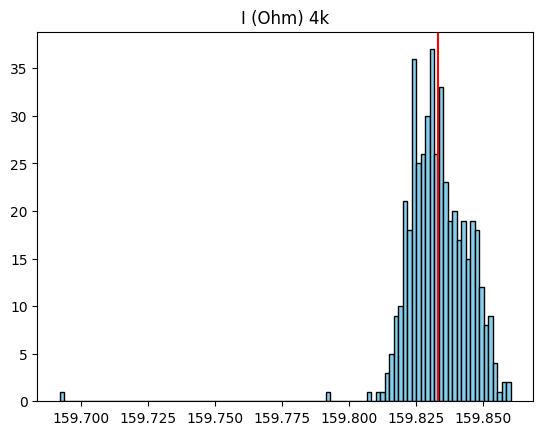

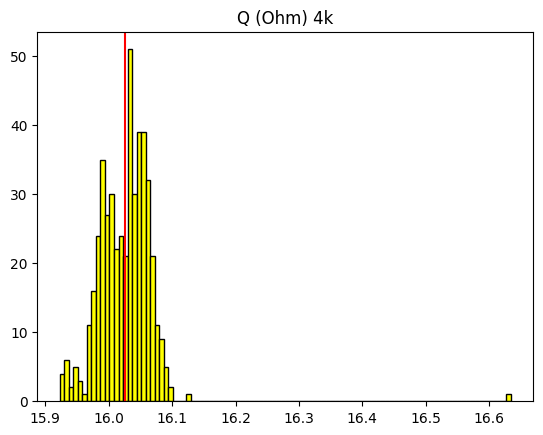

In [56]:
z_real_4k = plt.hist(df_4k["Z_real"], bins=100, color="skyblue", edgecolor="black")
plt.title("I (Ohm) 4k")
plt.axvline(df_4k["Z_real"].mean(), color='red')
plt.show(z_real_4k)

z_imag_4k = plt.hist(df_4k["Z_imag"], bins=100, color="yellow", edgecolor="black")
plt.title("Q (Ohm) 4k")
plt.axvline(df_4k["Z_imag"].mean(), color='red')
plt.show()

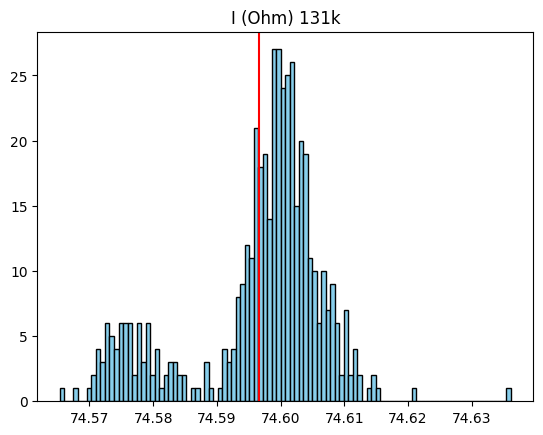

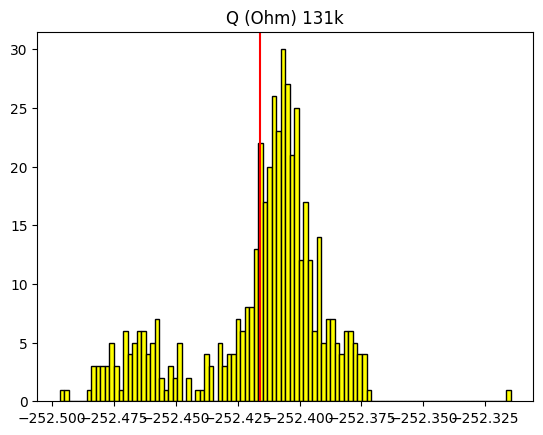

In [40]:
z_real_131k = plt.hist(df_131k["Z_real"], bins=100, color="skyblue", edgecolor="black")
plt.title("I (Ohm) 131k")
plt.axvline(df_131k["Z_real"].mean(), color="red")
plt.show(z_real_131k)
z_imag_131k = plt.hist(df_131k["Z_imag"], bins=100, color="yellow", edgecolor="black")
plt.title("Q (Ohm) 131k")
plt.axvline(df_131k["Z_imag"].mean(), color="red")
plt.show(z_imag_131k)

Export dataframes to csv file under the `df_exports/` directory

# Graphing UNCALIBRATED 4.104 kHz and 131.328 kHz measurements

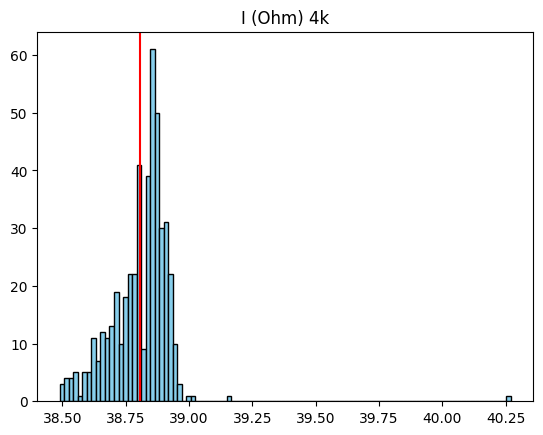

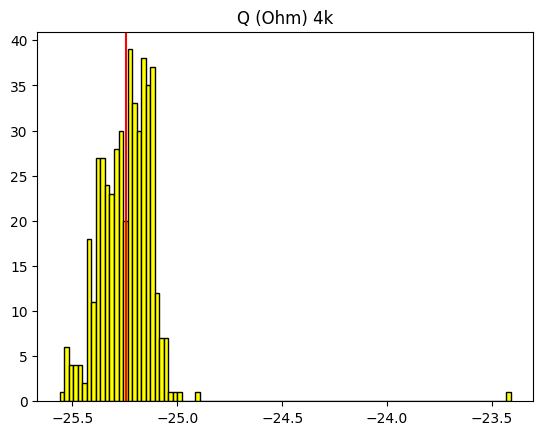

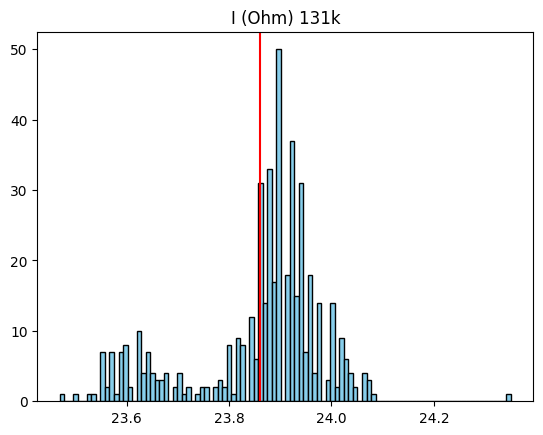

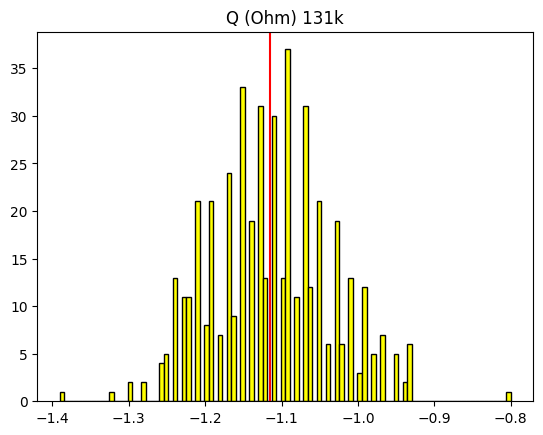

In [57]:
I_4k = plt.hist(df_4k["I"], bins=100, color="skyblue", edgecolor="black")
plt.title("I (Ohm) 4k")
plt.axvline(df_4k["I"].mean(), color='red')
plt.show(I_4k)

Q_4k = plt.hist(df_4k["Q"], bins=100, color="yellow", edgecolor="black")
plt.title("Q (Ohm) 4k")
plt.axvline(df_4k["Q"].mean(), color='red')
plt.show()

I_131k = plt.hist(df_131k["I"], bins=100, color="skyblue", edgecolor="black")
plt.title("I (Ohm) 131k")
plt.axvline(df_131k["I"].mean(), color="red")
plt.show(I_131k)

Q_131k = plt.hist(df_131k["Q"], bins=100, color="yellow", edgecolor="black")
plt.title("Q (Ohm) 131k")
plt.axvline(df_131k["Q"].mean(), color="red")
plt.show(Q_131k)

In [ ]:
# df_4k.to_csv(f"logs_32655-system/df_exports/4k/df_4k{date.now().strftime("%Y-%m-%d %H-%M")}.csv", index=False)
# df_131k.to_csv(f"logs_32655-system/df_exports/131k/df_131k{date.now().strftime("%Y-%m-%d %H-%M")}.csv", index=False)

In [36]:
print(f"131k Z_real: {df_131k['Z_real'].mean()}")
print(f"131k Z_imag: {df_131k['Z_imag'].mean()}")
print(f"4k   Z_real: {df_4k['Z_real'].mean()}")
print(f"4k   Z_imag: {df_4k['Z_imag'].mean()}")

131k Z_real: 74.59665762790958
131k Z_imag: -252.41579124419258
4k   Z_real: 159.83331030640733
4k   Z_imag: 16.02505843222876


In [ ]:
# Error difference from simulated values